<a href="https://colab.research.google.com/github/sunyingjian/-Logging-related-network/blob/master/%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font size=5px color="red">✦ *Google Colab 突破90分钟自动断开:</font>
<p><font size=3px > 每60分钟自动运行代码以刷新90分钟断开限制. 打开 developer-settings (在你的浏览器) 快速健 Ctrl+Shift+I 然后按console 输入以下代码 Enter. ( mac 按 Option+Command+I)</p><b>复制以下隐藏代码粉贴在浏览器console！！不要关闭浏览器以免失效</b>

<code>function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-connect-button").click() 
}setInterval(ClickConnect,6000)</code>

In [ ]:
#@markdown <h3>← 输入了代码后运行以防止断开</h>


import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


#引入数据

In [ ]:
! git clone https://github.com/sunyingjian/numpy-.git

Cloning into 'numpy-'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 94 (delta 0), reused 0 (delta 0), pack-reused 89
Unpacking objects: 100% (94/94), done.


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#数据处理

In [ ]:
%matplotlib inline
#%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)#设置要显示的默认行数，显示的最大行数是10
pd.options.mode.chained_assignment = None #为了在增加列表行数的时候防止出现setting with copy warning
filename = 'facies_vectors.csv'
training_data = pd.read_csv('/content/numpy-/3345train data.csv')
training_data
testing_data = pd.read_csv('/content/numpy-/3345test_data.csv')
testing_data

,AC,CAL,GR,K,RD,SP,Core Lithology
0,0.038756,0.026970,0.094776,0.112543,0.001420,0.614504,5
1,0.347382,0.090194,0.145150,0.202335,0.002744,0.339568,7
2,0.218400,0.059510,0.252165,0.711295,0.003874,0.918567,3
3,0.366064,0.082147,0.149304,0.201731,0.003290,0.343180,7
4,0.291877,0.079981,0.141782,0.289309,0.003455,0.344605,7
...,...,...,...,...,...,...,...
361,0.016947,0.138827,0.118400,0.358567,0.281687,0.302936,6
362,0.131043,0.069016,0.029354,0.060197,0.282093,0.253809,3
363,0.036182,0.032010,0.030090,0.071069,0.359737,0.435486,5
364,0.014562,0.127332,0.035014,0.178579,0.803566,0.311641,6


In [ ]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
training_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3.345000e+03,3345.000000,3345.000000
mean,2.107992e-01,1.450162e-01,1.662901e-01,3.464980e-01,4.917120e-02,0.418110,4.221525
std,1.099814e-01,1.353280e-01,1.036918e-01,1.808527e-01,8.719010e-02,0.196548,2.079667
min,1.000000e-07,1.000000e-08,1.000000e-07,1.000000e-07,1.000000e-09,-0.062739,1.000000
25%,1.594008e-01,5.225926e-02,8.778840e-02,2.079726e-01,1.270254e-02,0.325241,2.000000
50%,2.124234e-01,9.779821e-02,1.520483e-01,3.352124e-01,2.403313e-02,0.384527,4.000000
75%,2.574892e-01,1.850738e-01,2.359244e-01,4.811758e-01,4.815465e-02,0.439047,7.000000
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,7.000000


In [ ]:
# 1=粗砂岩  2=中砂岩   3=细砂岩
# 4=粉砂岩 5=白云岩 6=石灰岩 7=泥岩

facies_labels = ['CS', 'MS', 'FS', 'SS', 'DM',
                 'LS', 'MDS']
testing_data.describe()

,AC,CAL,GR,K,RD,SP,Core Lithology
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.214074,0.148747,0.147995,0.330942,0.046567,0.389129,4.215847
std,0.108781,0.144160,0.087543,0.181384,0.080542,0.196271,2.072619
min,0.003611,0.007118,0.005029,0.025971,0.001420,-0.061365,1.000000
25%,0.162638,0.052989,0.079442,0.194786,0.012828,0.317109,2.000000
50%,0.215371,0.098682,0.132807,0.302396,0.022275,0.379000,4.000000
75%,0.269240,0.179492,0.217013,0.456563,0.047410,0.435390,7.000000
max,0.713160,0.994694,0.483319,0.994363,0.891134,0.997070,7.000000


In [ ]:
correct_facies_labels = training_data['Core Lithology'].values
correct_facies_labels_test = testing_data['Core Lithology'].values
feature_vectors = training_data.drop(['Core Lithology'], axis=1)
feature_vectors_test = testing_data.drop(['Core Lithology'], axis=1)
feature_vectors.describe()
feature_vectors_test.describe()

,AC,CAL,GR,K,RD,SP
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.214074,0.148747,0.147995,0.330942,0.046567,0.389129
std,0.108781,0.144160,0.087543,0.181384,0.080542,0.196271
min,0.003611,0.007118,0.005029,0.025971,0.001420,-0.061365
25%,0.162638,0.052989,0.079442,0.194786,0.012828,0.317109
50%,0.215371,0.098682,0.132807,0.302396,0.022275,0.379000
75%,0.269240,0.179492,0.217013,0.456563,0.047410,0.435390
max,0.713160,0.994694,0.483319,0.994363,0.891134,0.997070


In [ ]:
X_train = feature_vectors 
X_test = feature_vectors_test
y_train = correct_facies_labels
y_test = correct_facies_labels_test

#RNN分类

In [ ]:
import tensorflow as tf
print('tensorflow:',format(tf.__version__))
import matplotlib.pyplot as plt
import numpy as np

tensorflow: 2.2.0


Using TensorFlow backend.


In [ ]:
model =  tf.keras.Sequential([
                              tf.keras.layers.Embedding(input_dim=6,output_dim=64),
                              tf.keras.layers.GRU(64,return_sequences=True),
                              tf.keras.layers.SimpleRNN(32),
                              tf.keras.layers.Dense(7)
])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 64)          384       
_________________________________________________________________
gru_6 (GRU)                  (None, None, 64)          24960     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_39 (Dense)             (None, 7)                 231       
Total params: 28,679
Trainable params: 28,679
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

In [ ]:
history=model.fit(X_train,y_train,
         epochs=100,
         validation_data=(X_test,y_test))

Epoch 1/100
105/105 [==============================] - 2s 16ms/step - loss: 8.6977 - acc: 0.0580 - val_loss: 4.4830 - val_acc: 0.0546
Epoch 2/100
105/105 [==============================] - 1s 9ms/step - loss: 4.3629 - acc: 0.0676 - val_loss: 4.2856 - val_acc: 0.0355
Epoch 3/100
105/105 [==============================] - 1s 9ms/step - loss: 4.3262 - acc: 0.1181 - val_loss: 4.2849 - val_acc: 0.2186
Epoch 4/100
105/105 [==============================] - 1s 9ms/step - loss: 4.3267 - acc: 0.1070 - val_loss: 4.2842 - val_acc: 0.2186
Epoch 5/100
105/105 [==============================] - 1s 9ms/step - loss: 4.3261 - acc: 0.1280 - val_loss: 4.2847 - val_acc: 0.1448
Epoch 6/100
105/105 [==============================] - 1s 9ms/step - loss: 4.3274 - acc: 0.1013 - val_loss: 4.2857 - val_acc: 0.0355
Epoch 7/100
105/105 [==============================] - 1s 9ms/step - loss: 4.3293 - acc: 0.1082 - val_loss: 4.2858 - val_acc: 0.0355
Epoch 8/100
105/105 [==============================] - 1s 9ms/step -

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

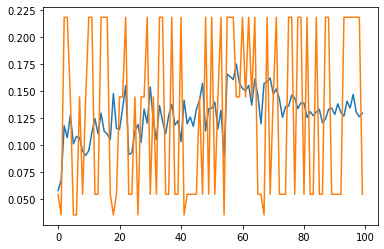

In [ ]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')

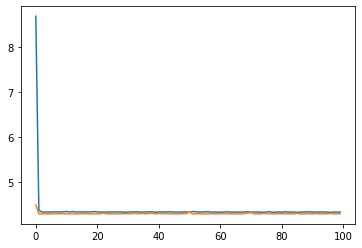

In [ ]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')